<a href="https://colab.research.google.com/github/Leerith/Metodos.compartido/blob/main/3_Entrega_mec%C3%A1nica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

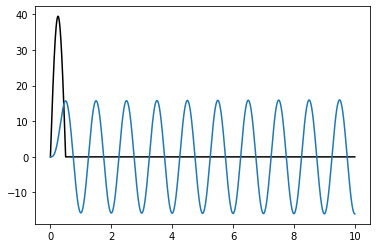

In [ ]:
#Aquí hice mis plots para la primera entrega de mecánica. Cambiando el intervalo de actuación de la fuerza de T/2 a T en los dos while, y poniendo los np.sin()
#dentro de un np.absolute() podéis generar los otros 3 casos (este es una fuerza seno durante medio período)

x=np.array([0.,0.,0.])   #x=(temps, posició, velocitat)
X=np.array([x])          #Matriu on guardem els valors d'x
dt=10**(-4) #Δt=0.0001s
T=1         #El període d'oscil·lació és una unitat de temps
w=2*np.pi/T #La freqüència angular és 2π/T
K=10        #K és la relació (f_0/m)/w^2. [K]=L
a=K*(w**2)  #a:=f_0/m, expressat en termes de w^2 per simplificar més endavant
f=0         #la força inicial es 0
F=np.array([f])  #matriu on guardem els valors d'f

while x[0] <= T/2:
  x=x+dt*np.array([1.,x[2],a*np.sin(w*x[0])-(w**2)*x[1]]) #Durant mig període
  X=np.append(X,[x],axis=0)                               #tenim la força externa.
  f=a/10*np.sin(w*x[0])  #Reescalem la força en un factor 1/10 per estètica
  F=np.append(F,[f])     #Esta es otra manera de añadir elementos a una matriz, usando numpy. Hace básicamente lo mismo que la que uso en'Dos Muelles'
                         #pero te permite añadir vectores enteros a una matriz en forma de una fila, para guardar más datos en una sola matriz
                         #Lo usé simplemente para poder guardar x,v y t en una sola matriz 'de estado', y ya puestos usé lo mismo para F

while T/2 < x[0] <= 10*T:
  x=x+dt*np.array([1.,x[2],-(w**2)*x[1]])                 #La resta del temps,
  X=np.append(X,[x],axis=0)                               #només tenim força elàstica.
  f=0
  F=np.append(F,[f])

#Si os fijáis, aquí en vez de hacer un while de 0 a 10T y dentro separar en dos partes con un if, directamente he hecho dos whiles.
#en programación muchas veces hay varias maneras de hacer algo que dan un resultado exactamente igual, lo único que hay que intentar es no llenar el código con
#más líneas de las que hacen falta para que no tarde mil años en llevarse a cabo

XT=X.transpose() #Aquí simplemente transpongo la matriz de datos para que en vez de tener chorrocientas fillas con (t,x,v) en cada una,
#tenga en una fila todos los t, en una fila todos los x y en otra los v (datos organizados por filas, no por columnas, así es más fácil plotearlos luego)

plt.plot(XT[0],F,'k')
plt.plot(XT[0],XT[1])

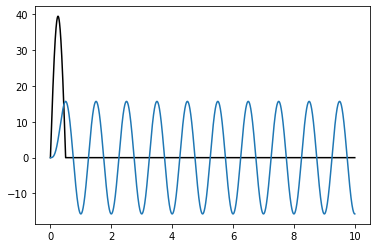

In [ ]:
#Este es el plot de la solución que encontré con el método de Green, en vez de aproximar la EDO por intervalos pequeños, simplemente ploteo la solución
#que encontré para comparar resultados

y=np.array([0,0])
Y=np.array([y])
#L'expressió d'x(t) se simplifica per la relació f_0/mw^2=a/w^2=K
while y[0] <= T/2:
  y=np.array([y[0]+dt,K/2*(np.sin(w*y[0])-w*y[0]*np.cos(w*y[0]))])
  Y=np.append(Y,[y],axis=0)

while T/2 < y[0] <= 10:
  y=np.array([y[0]+dt,-np.pi*K/2*np.cos(w*y[0])])
  Y=np.append(Y,[y],axis=0)

YT=Y.transpose()

plt.plot(XT[0],F,'k')
plt.plot(YT[0],YT[1])